### K-Nearest Neighbors (KNN) Classification Algorithm

The K-Nearest Neighbors (KNN) classification algorithm is an instance-based learning method that classifies a new data point based on the majority class of its k nearest neighbors. It’s simple, intuitive, and effective for various types of classification problems.

### How KNN Classification Works

1. **Selecting the Number of Neighbors (k)**: Choose the number of nearest neighbors, typically an odd number to avoid ties in classification.
2. **Calculating Distance**: Calculate the distance between the new data point and all the training data points. Common distance metrics include Euclidean, Manhattan, or Minkowski distance.
3. **Identifying Neighbors**: Select the k closest training data points.
4. **Predicting the Output**: The new data point is assigned the class that is most common among its k nearest neighbors.

### Detailed Steps with Example

Let's go through an example relevant to the public and government sector. Suppose we want to classify whether states are "High Spending" or "Low Spending" on public infrastructure based on features such as population size, GDP, and area.

#### Example Data

| State       | Population (millions) | GDP (billions USD) | Area (thousand km²) | Spending (Category) |
|-------------|------------------------|---------------------|----------------------|----------------------|
| State A     | 10                     | 300                 | 50                   | Low                  |
| State B     | 20                     | 500                 | 70                   | High                 |
| State C     | 15                     | 400                 | 60                   | Low                  |
| State D     | 30                     | 600                 | 80                   | High                 |
| State E     | 25                     | 550                 | 75                   | High                 |

We want to classify a new state with the following features: Population = 18 million, GDP = 450 billion USD, Area = 65 thousand km².

#### Step-by-Step Process

1. **Determine k**: Let's choose k=3 for this example.

2. **Calculate Distance**: Use Euclidean distance to calculate the distance between the new state and each of the training states.

   Euclidean Distance Formula:
   \$
   d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + (z_1 - z_2)^2}
   \$

   Where \(x\), \(y\), and \(z\) are the features (Population, GDP, Area).

   **Distance to State A**:
   \$
   d_A = \sqrt{(18 - 10)^2 + (450 - 300)^2 + (65 - 50)^2} = \sqrt{8^2 + 150^2 + 15^2} = \sqrt{64 + 22500 + 225} = \sqrt{22789} \approx 150.96
   \$

   **Distance to State B**:
   \$
   d_B = \sqrt{(18 - 20)^2 + (450 - 500)^2 + (65 - 70)^2} = \sqrt{2^2 + 50^2 + 5^2} = \sqrt{4 + 2500 + 25} = \sqrt{2529} \approx 50.29
   \$

   **Distance to State C**:
   \$
   d_C = \sqrt{(18 - 15)^2 + (450 - 400)^2 + (65 - 60)^2} = \sqrt{3^2 + 50^2 + 5^2} = \sqrt{9 + 2500 + 25} = \sqrt{2534} \approx 50.34
   \$

   **Distance to State D**:
   \$
   d_D = \sqrt{(18 - 30)^2 + (450 - 600)^2 + (65 - 80)^2} = \sqrt{12^2 + 150^2 + 15^2} = \sqrt{144 + 22500 + 225} = \sqrt{22869} \approx 151.23
   \$

   **Distance to State E**:
   \$
   d_E = \sqrt{(18 - 25)^2 + (450 - 550)^2 + (65 - 75)^2} = \sqrt{7^2 + 100^2 + 10^2} = \sqrt{49 + 10000 + 100} = \sqrt{10149} \approx 100.74
   \$

3. **Identify the k Nearest Neighbors**: The three closest states are B, C, and E with distances 50.29, 50.34, and 100.74 respectively.

4. **Predict the Output**: The new state is classified based on the majority class of its nearest neighbors. Here, State B (High), State C (Low), and State E (High). So, the majority class is High.

Therefore, the new state is classified as **High Spending**.

### Applications in the Public and Government Sector

1. **Public Health**: Classifying regions as high or low risk for disease outbreaks based on past data.
2. **Crime Rate Prediction**: Classifying areas into different crime rate categories based on historical data, demographic information, and socioeconomic factors.
3. **Economic Policy Making**: Classifying regions into various economic zones based on historical data and various economic parameters.
4. **Resource Allocation**: Classifying regions for resource allocation (e.g., number of schools or hospitals) based on population growth, migration trends, and other factors.

1. **Load the Data**: We create a DataFrame with the provided data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Load the data
data = {
    'State': ['State A', 'State B', 'State C', 'State D', 'State E'],
    'Population': [10, 20, 15, 30, 25],
    'GDP': [300, 500, 400, 600, 550],
    'Area': [50, 70, 60, 80, 75],
    'Spending': ['Low', 'High', 'Low', 'High', 'High']
}
df = pd.DataFrame(data)

# Features and target variable
X = df[['Population', 'GDP', 'Area']]
y = df['Spending']

2. **Standardize the Features**: We use `StandardScaler` from `scikit-learn` to standardize the features. This ensures that all features contribute equally to the distance calculations.

In [2]:
# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# New state data
new_state = np.array([[18, 450, 65]])
new_state_scaled = scaler.transform(new_state)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


3. **Implement KNN Classification**: We create a `KNeighborsClassifier` model with `k=3` and fit it using the standardized training data.

In [3]:
# Step 3: Implement KNN classification
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=3)

4. **Make Predictions**: We transform the new state data using the same scaler and then predict the class using the trained KNN classifier.

In [4]:
# Step 4: Make predictions
predicted_class = knn.predict(new_state_scaled)
print(f'Predicted spending category for the new state: {predicted_class[0]}')

Predicted spending category for the new state: High


In [5]:
# Identify the k nearest neighbors
distances, indices = knn.kneighbors(new_state_scaled)

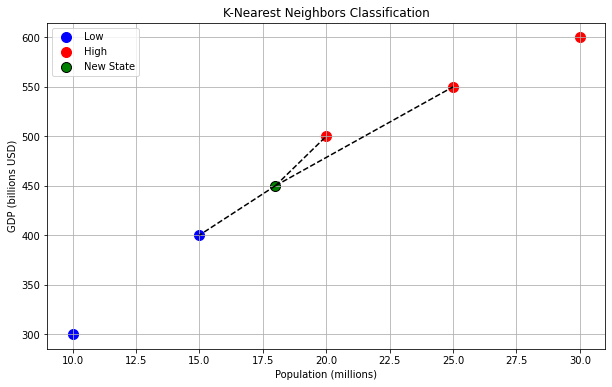

In [6]:
# Step 5: Visualization
plt.figure(figsize=(10, 6))

# Plot the training data points
colors = {'Low': 'blue', 'High': 'red'}
for category in colors:
    subset = df[df['Spending'] == category]
    plt.scatter(subset['Population'], subset['GDP'], c=colors[category], label=category, s=100)

# Plot the new data point
plt.scatter(new_state[0, 0], new_state[0, 1], c='green', label='New State', s=100, edgecolors='black')

# Plot lines to the k nearest neighbors
for i in indices[0]:
    plt.plot([new_state[0, 0], X.iloc[i, 0]], [new_state[0, 1], X.iloc[i, 1]], 'k--')

plt.xlabel('Population (millions)')
plt.ylabel('GDP (billions USD)')
plt.legend()
plt.title('K-Nearest Neighbors Classification')
plt.grid(True)